# Analiza zbioru mtcars.csv z danymi samochodów pod kątem wpływu rożnych parametrów na wielkość spalania.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv('mtcars.csv')

In [3]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Zamieniam jednostki na europejskie:

1 mpg (mila na galon) = 235.21 litrów na 100 km,

1 cal3 = 16.39 cm3,

1 lb = 0.4535 kg


In [4]:
cars['mpg'] = round((235.21 / cars['mpg']), 1)
cars['disp'] = round((cars['disp'] * 16.39), 0)
cars['wt'] = round((cars['wt'] * 0.4535 *1000), 0)

### Zmieniam nazwy kolumn na właściwe, oraz zamieszczam opis:

|KOLUMNA     | OPIS             |
|------------|------------------|
|spalanie    | litrów na 100 km |
|cyl         | ilość cylindrów  |
|km          | konie mechaniczne|
|przelozenie | przełożenie wału napędowego|
|waga| waga w kg|
|qsec|czas przejechania 1/4 mili w sekundach|
|vs| rodzaj silniaka:  0 - silnik "V",  1 - silnik rzędowy|
|am| rodzaj skrzyni biegów:  0 - skrzynia automatyczna, 1 - manualna|
|gear| ilość biegów|
|carb| ilość gaźników|

In [5]:
cars.rename(columns = {'mpg':'spalanie', 'disp':'pojemnosc', 'hp':'km', 'drat':'przelozenie', 'wt':'waga'}, inplace = True)

In [6]:
cars.describe()

,spalanie,cyl,pojemnosc,km,przelozenie,waga,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,12.750000,6.187500,3781.468750,146.687500,3.596563,1459.062500,17.848750,0.437500,0.406250,3.687500,2.8125
std,3.868483,1.785922,2031.298837,68.562868,0.534679,443.785035,1.786943,0.504016,0.498991,0.737804,1.6152
min,6.900000,4.000000,1165.000000,52.000000,2.760000,686.000000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,10.300000,4.000000,1980.250000,96.500000,3.080000,1170.500000,16.892500,0.000000,0.000000,3.000000,2.0000
50%,12.300000,6.000000,3217.500000,123.000000,3.695000,1508.000000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,15.275000,8.000000,5343.000000,180.000000,3.920000,1637.250000,18.900000,1.000000,1.000000,4.000000,4.0000
max,22.600000,8.000000,7736.000000,335.000000,4.930000,2460.000000,22.900000,1.000000,1.000000,5.000000,8.0000


### Sprawdzam, czy są braki w danych?

In [7]:
cars.isnull().sum()

model          0
spalanie       0
cyl            0
pojemnosc      0
km             0
przelozenie    0
waga           0
qsec           0
vs             0
am             0
gear           0
carb           0
dtype: int64

#### Nie ma braków w danych.
W przypadku braku w dancyh (NULL) można by było uzupełnić dane np. średnią .mean() , ale w tym zbiorze nie było takiej konieczności.
Można za to usunąć kolumnę z nazwami samochodów oraz qsec, ponieważ nie będą nam potrzebne do analizy.

In [8]:
cars = cars.drop(columns=['model','qsec'])

##### Poniżej rozkład zmiennej spalanie:

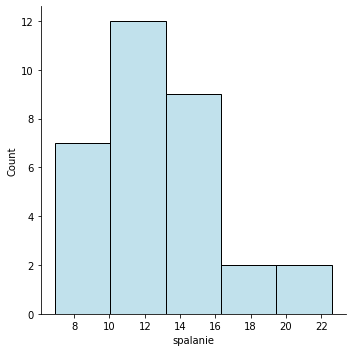

In [9]:
sns.displot(cars['spalanie'], kind='hist', bins=5, color='lightblue')


Z powyższego rozkładu wynika, że najwięcej samochodów ma średnie spalanie między 10 a 13 l/100km.

### Sprawdźmy jak ilośc cylindrów, typ silnika lub skrzyni biegów, ilość biegów lub gaźników wpływa na spalanie:

In [10]:
for col in ['cyl', 'vs', 'am', 'gear', 'carb']:
    print(cars['spalanie'].groupby(cars[col]).mean())

cyl
4     9.027273
6    11.971429
8    16.064286
Name: spalanie, dtype: float64
vs
0    14.900000
1     9.985714
Name: spalanie, dtype: float64
am
0    14.452632
1    10.261538
Name: spalanie, dtype: float64
gear
3    15.280000
4     9.966667
5    11.840000
Name: spalanie, dtype: float64
carb
1     9.714286
2    11.090000
3    14.466667
4    15.810000
6    11.900000
8    15.700000
Name: spalanie, dtype: float64


[Text(0.5, 0, 'Rodzaj skrzyni biegów:  0 - automatyczna,  1 - manualna'),
 Text(0, 0.5, 'Spalanie (l/100km)'),
 Text(0.5, 1.0, 'Skrzynia biegów a spalanie')]

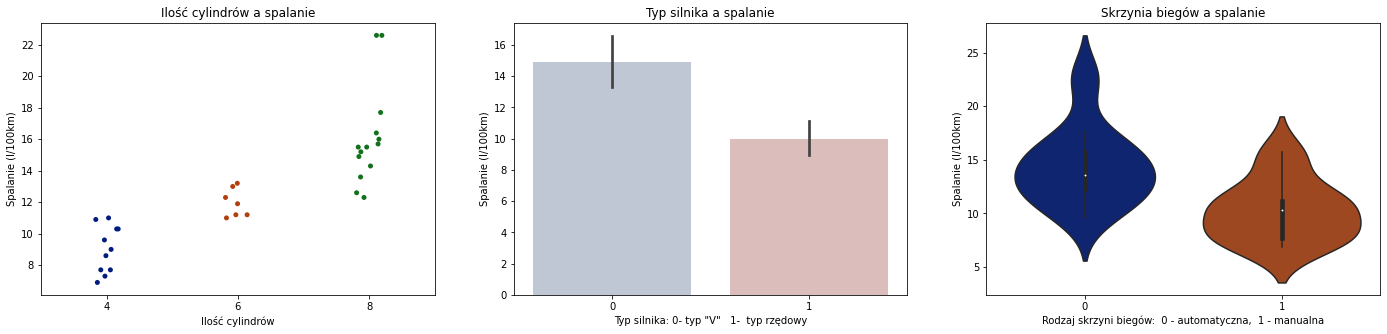

In [11]:
fig, axs = plt.subplots(ncols = 3, figsize=(24,5))
axs[0] = sns.stripplot(x='cyl', y='spalanie', data=cars, palette='dark', jitter=True, ax=axs[0])
axs[0].set(xlabel='Ilość cylindrów', ylabel='Spalanie (l/100km)', title='Ilość cylindrów a spalanie')
axs[1] = sns.barplot(x='vs', y='spalanie', data=cars, palette='vlag', ax=axs[1])
axs[1].set(xlabel='Typ silnika: 0- typ "V"   1-  typ rzędowy', ylabel='Spalanie (l/100km)', title='Typ silnika a spalanie')
axs[2] = sns.violinplot(x='am', y='spalanie', data=cars, palette='dark')
axs[2].set(xlabel='Rodzaj skrzyni biegów:  0 - automatyczna,  1 - manualna', ylabel='Spalanie (l/100km)', title='Skrzynia biegów a spalanie')

#### Z powyższej analizy wynika, że:

    1. spalanie rośnie wraz z ilością cylindrów w silniku,
    2. silniki 'V' mają większe spalanie niż rzędowe,
    3. samochody ze skrzyniami automatycznymi generują większe spalanie niż z manualnymi,
    4. trudno jednoznacznie określić, czy ilość biegów wpływa na spalanie,
    5. ilość gaźników również nie ma jednoznacznego wpływu na spalanie.

### Sprawdźmy jak pozostałe paramery wpływają na spalanie:

In [12]:
y = cars['spalanie']
x = cars['pojemnosc']
a = cars['km']
b = cars['przelozenie']
c = cars['waga']

Text(0.5, 0, 'Waga w kg')

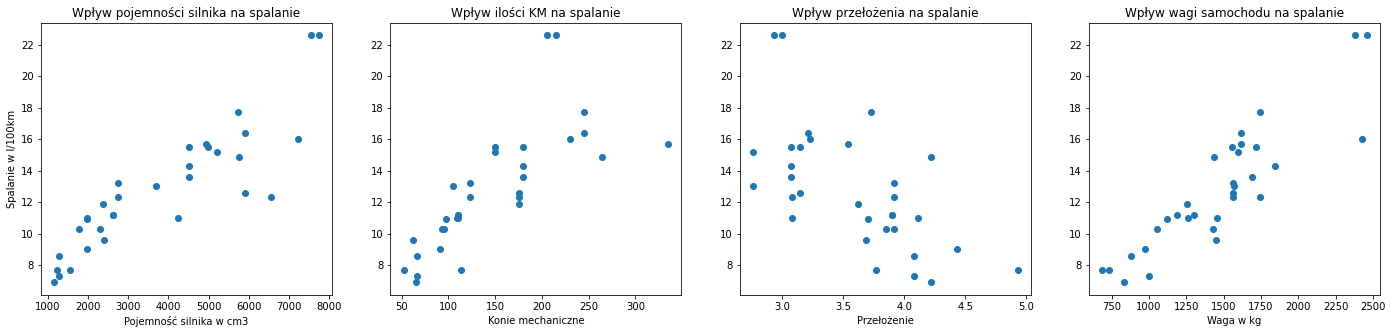

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,5))
axes[0].scatter(x,y)
axes[0].set_title('Wpływ pojemności silnika na spalanie')
axes[0].set_xlabel('Pojemność silnika w cm3')
axes[0].set_ylabel('Spalanie w l/100km')
axes[1].scatter(a,y)
axes[1].set_title('Wpływ ilości KM na spalanie')
axes[1].set_xlabel('Konie mechaniczne')
axes[2].scatter(b,y)
axes[2].set_title('Wpływ przełożenia na spalanie')
axes[2].set_xlabel('Przełożenie')
axes[3].scatter(c,y)
axes[3].set_title('Wpływ wagi samochodu na spalanie')
axes[3].set_xlabel('Waga w kg')

#### Z powyższych wykresów wynika iż:
    1. Im większa pojemność silnika tym większe spalanie.
    2. Im więcej koni mechanicznych tym również większe spalanie.
    3. Przełożenia nie mają większego wpływu na spalanie.
    4. Waga - im większa tym wyższe spalanie.

### Sprawdźmy jak wygląda tablica korelacji:

In [14]:
cars = pd.get_dummies(cars,columns=['vs','am'],drop_first=False)
cars = cars.drop(columns=['km','przelozenie','gear','carb'])

In [15]:
cars = cars.rename(columns={'vs_0':'typ V', 'vs_1':'typ rzd', 'am_0':'at', 'am_1':'mt'})

<AxesSubplot:>

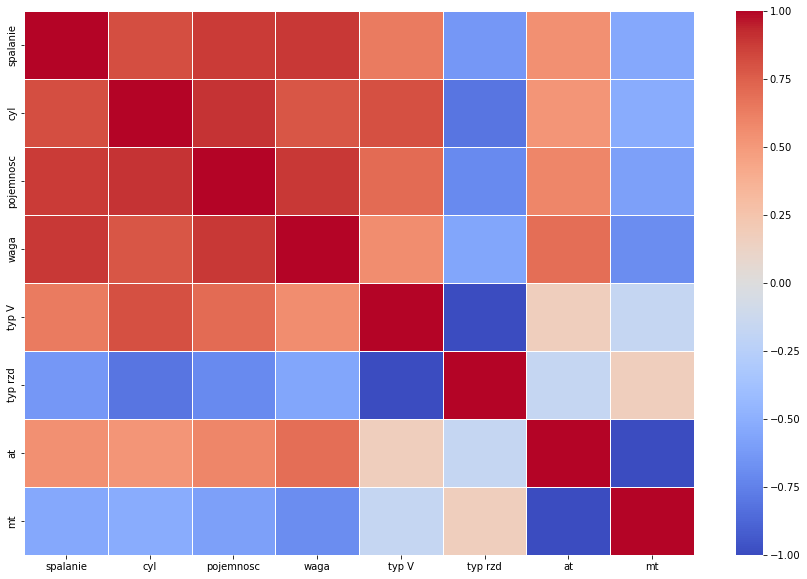

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(cars.corr(), cmap='coolwarm',linecolor='white', linewidths=1)

#### Na powyższej tablicy możemy potwierdzić wcześniejsze obserwacje:  silną korelację spalania z: ilością cylindrów, pojemnością, wagą, silnikami typu 'V', skrzyniami automatycznymi
